# __Análisis Lineal Discriminante__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
plt.style.use('seaborn')

In [3]:
df = pd.read_csv('iris.csv').drop(columns=['Unnamed: 0'])
df.sample()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
94,5.6,2.7,4.2,1.3,versicolor


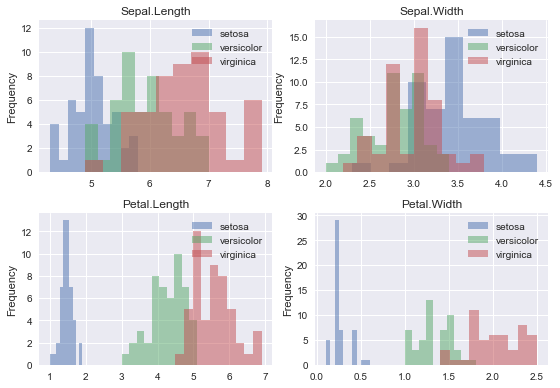

In [17]:
fig, ax = plt.subplots(2, 2)
axes= ax.flatten()
for n,i in enumerate(df.loc[:, 'Sepal.Length' : 'Petal.Width'].columns):
    df.groupby('Species')[i].plot(kind='hist', alpha=.5, ax=axes[n])
    axes[n].legend(df['Species'].unique())
    axes[n].set_title(i)
plt.tight_layout()


In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

In [20]:
df['Species'] = LabelEncoder().fit_transform(df['Species'])


In [36]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, 'Sepal.Length' : 'Petal.Width'], df['Species'], test_size=.33, random_state=11238)
ldaModel = LinearDiscriminantAnalysis()
ldaModel.fit_transform(X_train, y_train)
pd.DataFrame({'priors': ldaModel.priors_}, index =df['Species'].unique())

array([0.98770612, 0.01229388])

In [28]:
print(classification_report(y_test, ldaModel.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.88      0.93      0.90        15
           2       0.94      0.88      0.91        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import lec4_graphs as afx

In [30]:
qdaModel = QuadraticDiscriminantAnalysis()
qdaModel.fit(X_train, y_train)
qdaPrediction = qdaModel.predict(X_test)


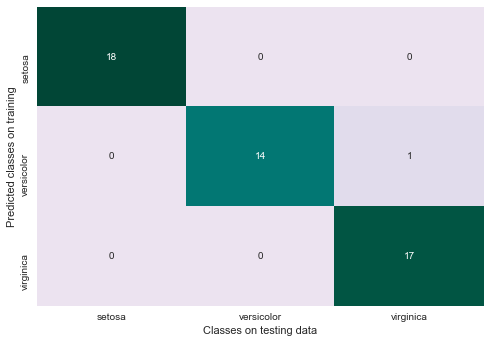

In [32]:
targets = ['setosa', 'versicolor', 'virginica']
afx.plot_confusion_matrix(y_test, qdaPrediction, targets)